# The Covid-19 Pandemic and Mental Health
__________________________________________________________________________________________________________________________________________________________________

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import numpy as np
from sklearn.linear_model import LinearRegression as lr
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
%store -r final_data
%store -r master_data

## Introduction

Given the hardships of the COVID-19 pandemic, not only the virus itself, but the effects of living under all the restrictions of the pandemic, I wanted to explore the effects on mental health and how we can predict increases in anxiety and depression. This will help mental health professionals and government agencies to know when to increase mental health resources and do so before the rates of anxiety and depression spike or get out of control. This saves time, resources, and lives and can increase the overall well being of Americans. Additionally, this could help us navigate mental health in future pandemics and epidemics. I posed the following research question:

How do changes in Covid-19 cases, hospitalizations, and deaths affect anxiety and depression in the United States, and how does this differ across states, age groups, and races, or change throughout time as the pandemic progresses?

While there is no linear correlation between covid cases/hospitalizations/deaths and levels of anxiety and depression when grouped by state or race, it appears possible to predict with relative accuracy mental health values when the multivariate linear regression model is fit on age group and positive Covid-19 cases. From preliminary data analysis, it appeared that as the pandemic progressed, anxiety and depression rates increased, however upon further exploration, we cannot conclude that there is a linear relationship between time and mental health value. Additionally, when percentage of Covid-19 tests that came back positive and mental health value were used as input variables, 12 distinct clusters of states were found, though there is no obvious explanation for the linkages within each cluster.

## Data Description

Each row in the final data set represents a subgroup of the adult population of the United States in a given time period based on either age, race, or state. The columns represent different measurement markers about each subset of the population within the given time period, including number of positive covid tests, and percent of the subgroup experiencing anxiety and/or depression (labeled as 'Value'). While some of the columns, such as 'state', are self explanatory, others warrant more description. The column "Value" contains the percentage of surveyed adults that have reported experiencing symptoms of anxiety or depression in the past week. The columns of Covid data were compiled by *The Atlantic's* The Covid Tracking Project, and based on data reported by the states. This includes both confirmed and probable cases based on the definitions of each state in the new_positives column. Phase corresponds to different rounds of the survey used to conduct the data throughout different points in the pandemic.

The mental health dataset was created through the Household survey conducted by the National Center for Household Statistics and the Census Bureau. The survey was an online format that asked participants to rate their symptoms of anxiety and depression from the last 7 days on a scale from 0-3. (0 = no symptoms, 1 = symptoms some days, 2 = symptoms half of the days, 3 = symptoms everyday). The purpose of the data collection was to find information on the mental health impact of the pandemic, although it did not include any covid data (I found and added covid data myself). Because the data was conducted by a survey, there are hindering elements of non-coverage or  non-response errors. Also, there are missing weeks in between phases of data collection. It is unclear if survey participants were aware of what the results of their data would be used for or if they knew there was a connection to covid. If they did, it is reasonable to speculate that they may have had a tendency to report more anxiety and depression symptoms with a pandemic on the forefront of their minds. Preprocessing of this data set included converting survey responses, in which participants rated their symptoms 0-3 into two categories: experienced symptoms in the past 7 days or did not. Then this was turned into a percentage and placed in the "Value" section of the datatable as it appeared to the downloader/me. 

The covid dataset was compiled by *The Atlantic's* The Covid Tracking Project, a volunteer organization whose purpose is to publish information relating to the pandemic for public and/or news consumption. The following are sponsors of this project: Beneficus Foundation, Emerson Collective, the Robert Wood Johnson Foundation, the Rockefeller Foundation, and Patrick J. McGovern Foundation. Because the data is compiled from each state's reports, and each state uses slightly different definitions for what is considered a positive case, and methods of testing, there is opportunity for some discrepancy between states as to what they count as a positive or probable covid case, etc. People are naturally aware that their covid test results are likely to be used in covid statistics, although this is not presumably what is on the forefront of their mind when they are being tested for, hospitalized for, or dying of the coronavirus. They are usually more focused on themselves and their health, and also, whether or not someone is positive for Covid-19 is an objective measure, so final data in this sense is likely unaffected by its collection.

The dataset that I used to bring in Covid-19 data for age and race comes from the Centers for Disease Control and Prevention's public use surveillance data created to keep the public informed on the state of the pandemic and how it affects different subgroups of the population. Each row in this data set represents a deidentified patient case of Covid-19 in the United States. For this reason, as you can see in my data cleaning appendix, I had to add cases across each distinct subgroup of the population for each given time period. The columns that I kept were case_month which is the month that the positive result was officially recorded, age group, and race (which I renamed Subgroup), and the number of hospitalizations, cases, and deaths. Since this data was reported to the CDC by a large quantity of individual health departments, mistakes or differences in testing and reporting between health jurisdictions could lead to some cases being reported, while others go unknown. The CDC compiles data submitted by these health jurisdictions on standardized case reporting forms and may remove some data if there are privacy concerns. Similarly to the previous dataset described, patients are likely naturally aware that their case will be used as a Covid-19 statistic. 

## Data Cleaning

An extensive data cleaning section can be found in the data cleaning appendix that is zipped with this file and can also be found in the source code folder that is linked at the bottom of this project.

## Preregistration Statement

### Analysis One: 

The first model that I will use for analysis is a multivariate linear regression on mental health score values that are grouped by state such that each state has its own regression line. The inputs will be percent positive covid cases, number of hospitalizations, and number of deaths. The reason that I am doing this is because in my preliminary data analysis, there was a correlation coefficient of 0.21 or less between percent positive cases and mental health value, covid hospitalizations and mental health value, and covid deaths and mental health value. However, when I chose a select number of states of which to display mental health values with a boxplot, I noticed that some states had much larger mental health score values than others, so I am interested in seeing how the factor of state may be affecting my overall general linear correlations. If the results are significant, it might point to differences in how the state governments responded to the pandemic, differences in the political affiliations of state's residents, or even reflect overall differences in the general mental health among residents of different states, covid aside. If the results are not significant, it would suggest that there is not a linear relationship between covid cases/deaths/hospitalizations and death based on state. 

Going off of this, I also plan on running linear regression models not only grouping by state, but also make separate models that group by age and race (each separately). If the results are significant for age, it may suggest that different ages have different susceptibility to mental health concerns perhaps based on their level of stability, developmental state, or the life circumstances that are common for that age group. Also, it is known that the coronavirus affects different age groups differently, so it would be interesting to see if more susceptible age groups also had greater levels of anxiety and depression. If the results are not statistically significant, it could mean that other factors besides age are better predictors of mental health value. If the results for race are statistically significant it could point to differing level of resources in different communities or differences in culture in terms of their approach to mental health. If the race results are not statistically significant, it could mean that there are other factors besides race that are better predictors of mental health value.

These models have valuable applications, because if we can predict that there will be higher levels of anxiety and/or depression in a certain area or within a certain population, we can divert resources there as soon as cases/hospitalizations/deaths start to rise rather than responding reactively after evidence of mental health problems become clear. By proactively intervening and providing resources, we can increase wellbeing and decrease the suffering of Americans.

### Analysis Two: 

I am going to do a linear regression with time as the input variable and mental health value as the output value. My preliminary data analysis suggests that there may be a positive linear relationship between phase of covid and level of mental health value. This could be important information because it could suggest that it is other effects of life during a pandemic that causes increased rates of anxiety and depression rather than the actual virus itself (especially if results from analysis one are insignificant). If this is true, it is important because it would suggest that the long-term duration of a pandemic rather than spikes of increased cases/lockdowns is what is most harmful to American mental health. In this case it would make sense for the governments to consider more drastic and stringent shut downs and restrictions, but for shorter periods of time. It would also support the idea of faster vaccine rollout. If it is not statistically significant, it may suggest that continuing restrictions will not be as detrimental to mental health and it is reasonable to focus more on virus spread rather than mental health. 

### Analysis Three: 

I will perform a k - means clustering using sklearn and observe which states fall into which clusters. First, I will plot the silhouette score for each possible k (number of clusters) to optimize cluster quality in my model. Then, I will do a k - means clustering model on the state data with predictor variables of percent of positive cases and mental health value as the indicator variables. I will use percent positive cases rather than quantity of new cases to account for differences in state populations that lead to differences in total covid cases. I can evaluate potential similarities between the states within each cluster to identify other possible influences on the link between Covid-19 cases and mental health values. For example, if it seems that the states are grouped by geography, population, or political affiliation, it could help us better predict mental health value in those states just based on cases and geography/population/etc. This can help maximize the efficacy and impact of mental health resources by directing them to the areas that will most need them. If the results are not significant, it could mean that there are no clear differences in the relationship between mental health value and Covid-19 cases (percent positive) between different states, or that each state is very different, and should have its own model. 


## Data Analysis (with evaluation of significance where appropriate)

### Exploratory Data Analysis

In [2]:
# I will begin by looking at the individual variables

describe_value = master_data.Value.describe()
print('Summary for Mental Health Value (percent anxiety/depression)')
print(describe_value)
print()

describe_percent = master_data.percent_positive.describe()
print('Summary for Percent of Positive Tests')
print(describe_percent)
print("The reason that there is a negative minimum is because there were a few days with a negative number to compensate for mistakes made in the reporting of the\
 previous day. They are corrected the next day with negative values since this is a cumulative dataset constantly updated")
print()

describe_hospital = master_data.hospitalized.describe()
print('Summary for Number of Current Covid Hospitalizations')
print(describe_hospital)
print()

describe_death = master_data.new_deaths.describe()
print('Summary for Number of Covid Deaths')
print(describe_death)
print("The reason that there is a negative minimum is because there were a few days with a negative number to compensate for mistakes made in the reporting of the\
 previous day. They are corrected the next day with negative values since this is a cumulative dataset constantly updated")
print()

Summary for Mental Health Value (percent anxiety/depression)
count    5250.000000
mean       31.870438
std         7.191355
min         9.100000
25%        26.800000
50%        31.800000
75%        36.900000
max        58.700000
Name: Value, dtype: float64

Summary for Percent of Positive Tests
count    7540.000000
mean        0.137000
std         3.310214
min       -16.130400
25%         0.028100
50%         0.056950
75%         0.106125
max       286.372100
Name: percent_positive, dtype: float64
The reason that there is a negative minimum is because there were a few days with a negative number to compensate for mistakes made in the reporting of the previous day. They are corrected the next day with negative values since this is a cumulative dataset constantly updated

Summary for Number of Current Covid Hospitalizations
count      7298.000000
mean       6644.792546
std       16605.051217
min           0.000000
25%         337.000000
50%        1372.000000
75%        5732.500000
max  

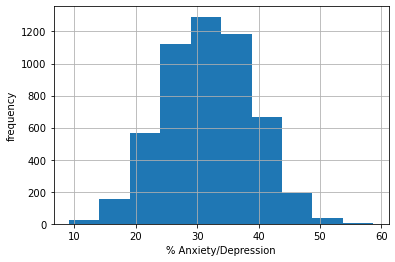

In [3]:
# Here are some histograms for the above summaries for easier visualization of the distributions
master_data.Value.hist()
xlabel = plt.xlabel('% Anxiety/Depression')
ylabel = plt.ylabel('frequency')

The percent of individuals experiencing anxiety and depression in any given time period is roughly normal with a mean of 31.9% and a range of 49.6%. There was never more than 58.7% or less than 9.1% of individuals suffering from anxiety or depression.

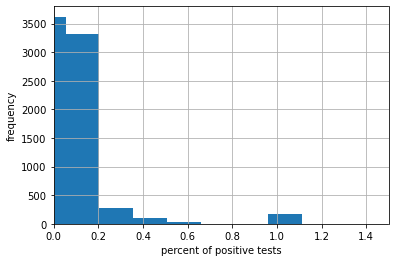

In [4]:
master_data.percent_positive.hist(bins = 2000).set_xlim((0, 1.5))
xlabel = plt.xlabel('percent of positive tests')
ylabel = plt.ylabel('frequency')

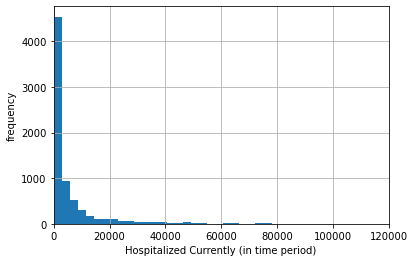

In [5]:
master_data.hospitalized.hist(bins = 100).set_xlim(0, 120000)
xlabel = plt.xlabel('Hospitalized Currently (in time period)')
ylabel = plt.ylabel('frequency')

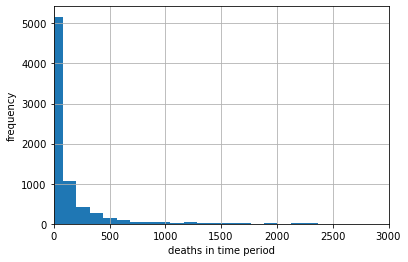

In [6]:
master_data.new_deaths.hist(bins = 60).set_xlim((0, 3000))
xlabel = plt.xlabel('deaths in time period')
ylabel = plt.ylabel('frequency')

The data for percent of positive tests, hospitalizations, and deaths is all heavily right skewed. Possible reasons for this could include lack of surveillance testing (or testing at all) in early months of the pandemic which would mean positive cases were under-represented.

The standard correlation between percent of positive tests and mental health value is 0.17
The rank correlation between percent of positive tests and mental health value is 0.32


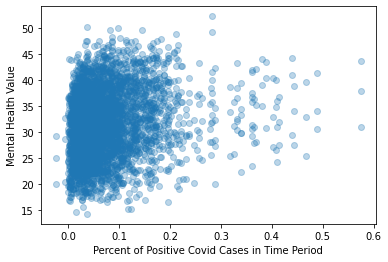

In [7]:
#In the next few cells, I will explore the correlation between variables
print('The standard correlation between percent of positive tests and mental health value is {:.2f}'.format(master_data.percent_positive.corr(method='pearson',other=master_data.Value)))
print('The rank correlation between percent of positive tests and mental health value is {:.2f}'.format(master_data.new_positives.corr(method='spearman',other=master_data.Value)))
mh_cases_plot = plt.scatter(alpha = 0.3, x = master_data.percent_positive, y=master_data.Value)
xlabel = plt.xlabel('Percent of Positive Covid Cases in Time Period')
ylabel = plt.ylabel('Mental Health Value')

The standard correlation between hospitalizations and mental health value is 0.21
The rank correlation between hospitalizations and mental health value is 0.28


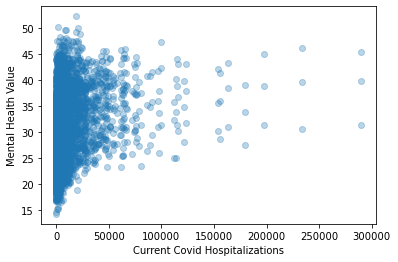

In [8]:
print('The standard correlation between hospitalizations and mental health value is {:.2f}'.format(master_data.hospitalized.corr(method='pearson',other=master_data.Value)))
print('The rank correlation between hospitalizations and mental health value is {:.2f}'.format(master_data.hospitalized.corr(method='spearman',other=master_data.Value)))
mh_hospital_plot = plt.scatter(alpha = 0.3, x = master_data.hospitalized, y=master_data.Value)
xlabel = plt.xlabel('Current Covid Hospitalizations')
ylabel = plt.ylabel('Mental Health Value')

The standard correlation between deaths and mental health value is 0.17
The rank correlation between deaths and mental health value is 0.24


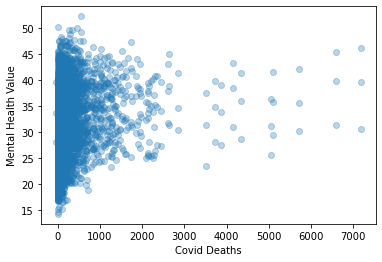

In [9]:
print('The standard correlation between deaths and mental health value is {:.2f}'.format(master_data.new_deaths.corr(method='pearson',other=master_data.Value)))
print('The rank correlation between deaths and mental health value is {:.2f}'.format(master_data.new_deaths.corr(method='spearman',other=master_data.Value)))
mh_death_plot = plt.scatter(alpha = 0.3, x = master_data.new_deaths, y=master_data.Value)
xlabel = plt.xlabel('Covid Deaths')
ylabel = plt.ylabel('Mental Health Value')

Because there is little to no linear correlation between either percent positive cases, hospitalizations, or deaths and mental health value, it makes me wonder if differences between state, age, race, or other distinction is masking linear correlations that would exist within each one of these groups individually. I will later perform multivariate linear regressions with these different groupings to see. 

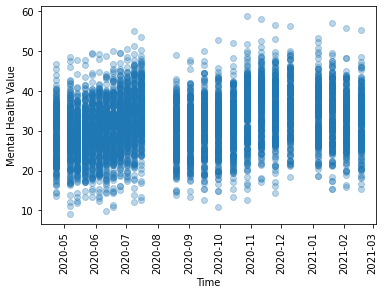

In [10]:
mh_time_plot = plt.scatter(alpha = 0.3, x = master_data.time_start, y=master_data.Value)
plt.xticks(rotation = 90)
xlabel = plt.xlabel('Time')
ylabel = plt.ylabel('Mental Health Value')

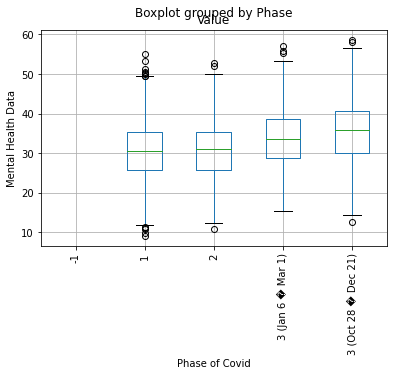

In [11]:
phasebox = master_data.boxplot(by = 'Phase', column = 'Value')
plt.xticks(rotation = 90)
xlabel = plt.xlabel('Phase of Covid')
ylabel = plt.ylabel('Mental Health Data')

It appears that there may be an upward trend in anxiety and depression rates as the pandemic progresses through the different phases. This suggests that it may be the effects of life and restrictions in a pandmeic that causes increased rates of anxiety and depression rather than the actual virus itself. I will later perfom a linear regression on phase to predict mental health value, to see if such a correlation is valid.

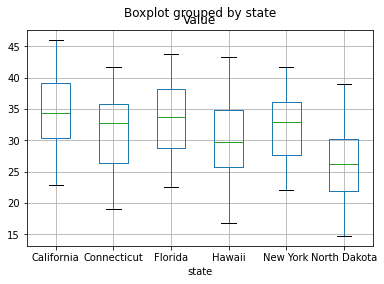

In [12]:
#Below are some boxplots for "important" states such as NY, FL, and CA who contain large portions of the population and have been in the news for covid at different
# points. I also included CT, ND, and HI for variety. 
substate = master_data[(master_data.state=='New York')|(master_data.state=='Florida')|(master_data.state=='California')|(master_data.state=='Connecticut')|(master_data.state=='North Dakota')|(master_data.state=='Hawaii')]
statebox = substate.boxplot(by = 'state', column = 'Value')

I find it interesting to note that the so called "problem states" (FL, CA, NY), which have been prominent in the news during different parts of the pandemic, have higher median levels of anxiety and depression than the others. This makes me wonder if analyzing that states seperately, or trying to cluster by states would show more of a correlation than the first scatterplot in this section, which showed little to no correlation between Covid-19 prevalence and mental health value. Perhaps different states have different models that work best for them.

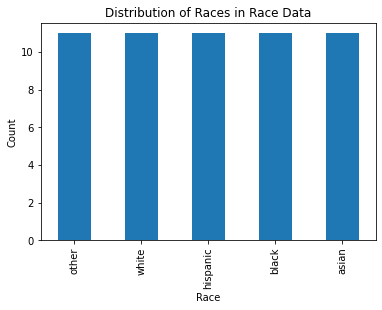

In [108]:
final_data_race['Subgroup'].value_counts().plot(kind='bar');
plt.title('Distribution of Races in Race Data');
plt.xlabel('Race');
plt.ylabel('Count');

The race categories are equally represented in our data, however, this is not representative of our population. Because of this, we will have to be careful when making conclusions based on the race data.

### Multivariate Linear Regression by State

In [13]:
multi_model_state = lr()
final_data_state = final_data[final_data.Group == 'By State'].drop(columns = ['case_month']).dropna()
final_data_state

,Indicator,Group,state,Subgroup,Phase,period,Time Period Label,time_start,time_end,Value,Low CI,High CI,new_deaths,hospitalized,new_positives,new_tests,percent_positive
18,Symptoms of Depressive Disorder,By State,Alabama,Alabama,1,1.0,Apr 23 - May 5,2020-04-23,2020-05-05,18.6,14.6,23.1,119.0,5884.0,2820.0,58006.0,0.0486
19,Symptoms of Anxiety Disorder,By State,Alabama,Alabama,1,1.0,Apr 23 - May 5,2020-04-23,2020-05-05,25.6,20.7,30.9,119.0,5884.0,2820.0,58006.0,0.0486
20,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Alabama,Alabama,1,1.0,Apr 23 - May 5,2020-04-23,2020-05-05,30.3,24.8,36.2,119.0,5884.0,2820.0,58006.0,0.0486
21,Symptoms of Depressive Disorder,By State,Alaska,Alaska,1,1.0,Apr 23 - May 5,2020-04-23,2020-05-05,19.2,16.8,21.8,0.0,255.0,36.0,10533.0,0.0034
22,Symptoms of Anxiety Disorder,By State,Alaska,Alaska,1,1.0,Apr 23 - May 5,2020-04-23,2020-05-05,27.7,24.8,30.7,0.0,255.0,36.0,10533.0,0.0034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4306,Symptoms of Anxiety Disorder,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25.0,Feb 17 - Mar 1,2021-02-17,2021-03-01,26.4,22.4,30.6,226.0,4451.0,9282.0,390079.0,0.0238
4307,Symptoms of Anxiety Disorder or Depressive Dis...,By State,Wisconsin,Wisconsin,3 (Jan 6 � Mar 1),25.0,Feb 17 - Mar 1,2021-02-17,2021-03-01,30.4,26.4,34.6,226.0,4451.0,9282.0,390079.0,0.0238
4308,Symptoms of Depressive Disorder,By State,Wyoming,Wyoming,3 (Jan 6 � Mar 1),25.0,Feb 17 - Mar 1,2021-02-17,2021-03-01,28.3,22.4,34.8,9.0,346.0,1120.0,26238.0,0.0427
4309,Symptoms of Anxiety Disorder,By State,Wyoming,Wyoming,3 (Jan 6 � Mar 1),25.0,Feb 17 - Mar 1,2021-02-17,2021-03-01,33.2,27.1,39.8,9.0,346.0,1120.0,26238.0,0.0427


In [14]:
predictors = ['new_deaths', 'hospitalized', 'percent_positive']
multi_model_state.fit(X = final_data_state[predictors], y = final_data_state.Value)

for featurenum in range(len(predictors)):
    print('The coefficient for {} is {:.3}'.format(predictors[featurenum],multi_model_state.coef_[featurenum]))
print('The r-squared score of this multivariable linear regression model is {:.2f}'.format(multi_model_state.score(final_data_state[predictors], final_data_state.Value)))

The coefficient for new_deaths is -0.00108
The coefficient for hospitalized is 7.81e-05
The coefficient for percent_positive is 12.8
The r-squared score of this multivariable linear regression model is 0.06


While I cannot graph the above multivariate regression, because it is in 4 dimensions, below is a two dimensional scatterplot with just percent positive cases and mental health value colored by state for visualization. Beacuse there are so many states that it would be hard to visualize on one graph, I have chosen the first 5 alphabetical states to display. This plot allows us to see that the lack of correlation for some states, and the almost vertical line correlation for other states, which shows a tendency for a certain percent positive range and a range of mental health values at that rate, rather than a linear relationship between the two. Thus, it makes sense visually that we do not see a strong correlation coefficient in our multivariate model.

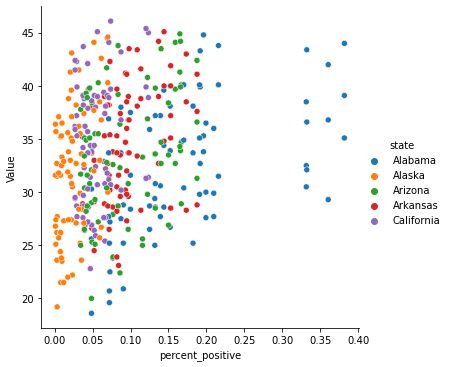

In [15]:
visual_model = lr().fit(final_data_state[ ['percent_positive'] ], final_data_state['Value'])

final_state_5 = final_data_state[(final_data_state.state=='Alabama') | \
                                (final_data_state.state=='Alaska') | \
                                (final_data_state.state=='Arizona') | \
                                (final_data_state.state=='Arkansas') | \
                                (final_data_state.state=='California')]
sns.relplot(x = 'percent_positive', y = 'Value', data = final_state_5, hue = 'state');

Since there does not appear to be a linear correlation when Covid-19 metrics (cases/hospitalizations/deaths) and state are indicator variables used to predict mental health value, I can tell just by the r-squared value that the results are not significant, therefore there is no need for further significance tests. 

### Single and Multivariate Linear Regression by Age

In [117]:
final_data_age = final_data[final_data.Group == 'By Age']

Regression slope for age group '18 - 49' is 0.000214
r-squared score value for age group '18 - 49' is 0.35
Regression slope for age group '50+' is 3.53e-05
r-squared score value for age group '50+' is 0.479


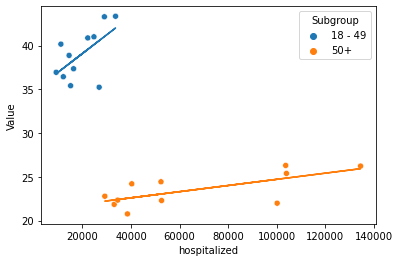

In [118]:
sns.scatterplot(data=final_data_age, x = 'hospitalized', y='Value', hue = 'Subgroup')

for age in final_data_age['Subgroup'].unique():

    final_data_age_subset = final_data_age[final_data_age.Subgroup == age]
    hospitalized_age = lr().fit(final_data_age_subset[['hospitalized']], final_data_age_subset['Value']);
   
    plt.plot(final_data_age_subset['hospitalized'], hospitalized_age.predict(final_data_age_subset[['hospitalized']]))
    print("Regression slope for age group \'{}' is {:.3}".format(age, hospitalized_age.coef_[0]))
    print("r-squared score value for age group \'{}' is {:.3}"\
          .format(age,hospitalized_age.score(final_data_age_subset[['hospitalized']], final_data_age_subset['Value'])))

Regression slope for age group '18 - 49' is 0.0019
r-squared score value for age group '18 - 49' is 0.0487
Regression slope for age group '50+' is 4.21e-05
r-squared score value for age group '50+' is 0.159


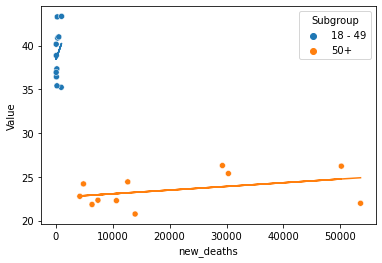

In [119]:
sns.scatterplot(data=final_data_age, x = 'new_deaths', y='Value', hue = 'Subgroup')

for age in final_data_age['Subgroup'].unique():
    
    final_data_age_subset = final_data_age[final_data_age.Subgroup == age]
    deaths_age = lr().fit(final_data_age_subset[['new_deaths']], final_data_age_subset['Value']);
   
    plt.plot(final_data_age_subset['new_deaths'], deaths_age.predict(final_data_age_subset[['new_deaths']]))
    
    print("Regression slope for age group \'{}' is {:.3}".format(age, deaths_age.coef_[0]))
    print("r-squared score value for age group \'{}' is {:.3}"\
          .format(age, deaths_age.score(final_data_age_subset[['new_deaths']], final_data_age_subset['Value'])))

Regression slope for age group '18 - 49' is 3.44e-06
r-squared score value for age group '18 - 49' is 0.76
Regression slope for age group '50+' is 3.32e-06
r-squared score value for age group '50+' is 0.752


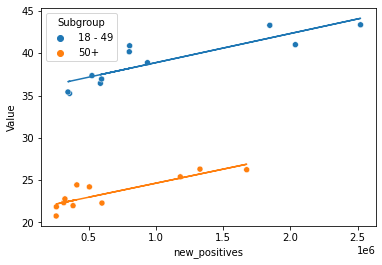

In [120]:
sns.scatterplot(data=final_data_age, x = 'new_positives', y='Value', hue = 'Subgroup')

for age in final_data_age['Subgroup'].unique():

    final_data_age_subset = final_data_age[final_data_age.Subgroup == age]
    positives_age = lr().fit(final_data_age_subset[['new_positives']], final_data_age_subset['Value']);
   
    plt.plot(final_data_age_subset['new_positives'], positives_age.predict(final_data_age_subset[['new_positives']]))
    print("Regression slope for age group \'{}' is {:.3}".format(age, positives_age.coef_[0]))
    print("r-squared score value for age group \'{}' is {:.3}"\
          .format(age,positives_age.score(final_data_age_subset[['new_positives']], final_data_age_subset['Value'])))

The above three linear regression graphs seem to suggest that the two different age groups (18-49 and 50+) each have their own linear model rather than having the same correlations shifted up or down. The highest r squared value for any of the above models is 0.752 so I will see if a multivariate model works better. 

In [121]:
final_data_age = final_data_age.copy()
final_data_age['is_young'] = pd.get_dummies(final_data_age['Subgroup'])['18 - 49']
final_data_age['is_old'] = pd.get_dummies(final_data_age['Subgroup'])['50+']

In [122]:
multi_model_age = lr()

predictors = ['new_positives', 'new_deaths', 'hospitalized', 'is_young', 'is_old']
multi_model_age.fit(X = final_data_age[predictors], y = final_data_age.Value)

for featurenum in range(len(predictors)):
    print('The coefficient for {} is {:.3}'.format(predictors[featurenum],multi_model_age.coef_[featurenum]))
print('The r-squared score of this multivariable linear regression model is {:.2f}'.format(multi_model_age.score(final_data_age[predictors], final_data_age.Value)))


The coefficient for new_positives is 3.26e-06
The coefficient for new_deaths is -5.28e-05
The coefficient for hospitalized is 2.02e-05
The coefficient for is_young is 7.08
The coefficient for is_old is -7.08
The r-squared score of this multivariable linear regression model is 0.98


A $r^2$ value of 0.98 is the highest I have seen on any analyses thus far and suggests a strong linear relationship when the indicator variables of age group and Covid-19 cases, hospitalizations, and deaths are used to predict mental health values. I will perform a hypothesis test for the above coefficients in order to further test the significance of this finding.

We want to test the following hypotheses at the alpha = 0.05 significance level. These null hypotheses assume that there is zero relationship.

new_positives:                                                     

$H_0$:  $\mu$ = 0             

$H_p$:  $\mu$ $\neq$ 0                         



hospitalizations: 

$H_0$:  $\mu$ = 0 

$H_p$:  $\mu$ $\neq$ 0



new_cases:

$H_0$:  $\mu$ = 0

$H_p$:  $\mu$ $\neq$ 0

In [123]:
#Hypothesis Test
x = final_data_age[predictors].reset_index(drop = True)
y = final_data_age[['Value']].reset_index(drop = True)
y_series = final_data_age.Value
df = x.join(y)

sm_model = smf.ols("y ~ x", data=df)
result = sm_model.fit()
print('P values:')
display(result.pvalues[:4])
print('Confidence Intervals:')
display(result.conf_int(0.05)[:4])

P values:


Intercept    1.429872e-18
x[0]         1.417606e-04
x[1]         4.042744e-01
x[2]         5.589010e-01
dtype: float64

Confidence Intervals:


,0,1
Intercept,17.833952,19.732689
x[0],0.000002,0.000005
x[1],-0.000183,0.000077
x[2],-0.000051,0.000092


The probability of getting a regression coefficient of 3.26 x $10^{-6}$ for new_positives by random chance alone is 1.42 x $10^{-4}$. Since the p-value of 1.42 x $10^{-4}$ is less than alpha = 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of new_positives is not due to random chance, and therefore the linear relationship between new_positives and mental health value is statistically significant.

The probability of getting a regression coefficient between new deaths and mental health value of -5.28 x $10^{-5}$ by random chance alone is 0.40. Since the p-value of 0.40 is NOT less than alpha = 0.05, we CANNOT reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of new_deaths (3.26e-06) could be due to random chance, and therefore, the linear relationship between new_deaths and mental health value is NOT statistically significant.

The probability of getting a regression coefficient of 2.02 x $10^{-5}$ for hospitalizations by random chance alone is 0.56. Since the p-value of 0.56 is NOT less than alpha = 0.05, we CANNOT reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of hospitalizations could be due to random chance, and therefore, the linear relationship between hospitalizations and mental health value is NOT statistically significant.

Since only one of the three covid metrics (new positives, hospitalizations, and new deaths), had a significant coefficient, I will run a new multivariate linear regression model using just new_positives and age as indicator variables.

In [114]:
multi_model_age_positives = lr()

predictors_pos = ['new_positives', 'is_young', 'is_old']
multi_model_age_positives.fit(X = final_data_age[predictors_pos], y = final_data_age.Value)

for featurenum in range(len(predictors_pos)):
    print('The coefficient for {} is {:.3}'.format(predictors_pos[featurenum],multi_model_age_positives.coef_[featurenum]))
print('The r-squared score of this multivariable linear regression model is {:.2f}'.format(multi_model_age_positives.score(final_data_age[predictors_pos], final_data_age.Value)))

The coefficient for new_positives is 3.4e-06
The coefficient for is_young is 7.11
The coefficient for is_old is -7.11
The r-squared score of this multivariable linear regression model is 0.98


We still have an r-squared value of 0.98 which shows a strong linear relationship. Therefore, I will perform a hypothesis test on this new linear model.

We want to test the following hypotheses at the alpha = 0.05 significance level. This null hypotheses assumes that there is zero relationship.

new_positives:                                                     

$H_0$:  $\mu$ = 0             

$H_p$:  $\mu$ $\neq$ 0      

In [115]:
#Hypothesis Test
x1 = final_data_age[predictors].reset_index(drop = True)
y1 = final_data_age[['Value']].reset_index(drop = True)
y_series1 = final_data_age.Value
df1 = x1.join(y1)

sm_model1 = smf.ols("y1 ~ x1", data=df1)
result1 = sm_model1.fit()
print('P values:')
display(result1.pvalues[:2])

P values:


Intercept    2.301368e-23
x1[0]        2.918989e-07
dtype: float64

Confidence Intervals:


,0,1
Intercept,18.274253,19.556307
x1[0],0.000002,0.000004


The probability of getting a regression coefficient of 3.4 x $10^{-6}$ for new_positives by random chance alone is 2.92 x $10^{-7}$. Since the p-value of 2.92 x $10^{-7}$ is less than alpha = 0.05, we reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of new_positives is not due to random chance, and therefore this multivariate linear model is statistically significant.

###  Linear Regression by Race

In [89]:
multi_model_race = lr()
final_data_race = final_data[final_data.Group == 'By Race/Hispanic ethnicity']
final_data_race

,Indicator,Group,state,Subgroup,Phase,period,Time Period Label,time_start,time_end,Value,Low CI,High CI,new_deaths,hospitalized,new_positives,new_tests,percent_positive,case_month
0,NaN,By Race/Hispanic ethnicity,NaN,asian,NaN,NaN,NaN,NaT,NaT,27.266667,24.133333,30.533333,1652.0,4743.0,17186.0,NaN,NaN,2020-04
1,NaN,By Race/Hispanic ethnicity,NaN,black,NaN,NaN,NaN,NaT,NaT,32.433333,30.133333,34.800000,8072.0,25724.0,92026.0,NaN,NaN,2020-04
2,NaN,By Race/Hispanic ethnicity,NaN,hispanic,NaN,NaN,NaN,NaT,NaT,36.133333,33.300000,39.000000,2955.0,13394.0,75884.0,NaN,NaN,2020-04
3,NaN,By Race/Hispanic ethnicity,NaN,other,NaN,NaN,NaN,NaT,NaT,36.800000,32.966667,40.800000,1493.0,5060.0,21946.0,NaN,NaN,2020-04
4,NaN,By Race/Hispanic ethnicity,NaN,white,NaN,NaN,NaN,NaT,NaT,28.000000,27.166667,28.800000,26082.0,40638.0,168357.0,NaN,NaN,2020-04
5,NaN,By Race/Hispanic ethnicity,NaN,asian,NaN,NaN,NaN,NaT,NaT,25.341667,22.225000,28.725000,301.0,1421.0,9699.0,NaN,NaN,2020-05
6,NaN,By Race/Hispanic ethnicity,NaN,black,NaN,NaN,NaN,NaT,NaT,32.908333,30.216667,35.700000,1333.0,9195.0,65556.0,NaN,NaN,2020-05
7,NaN,By Race/Hispanic ethnicity,NaN,hispanic,NaN,NaN,NaN,NaT,NaT,34.458333,31.716667,37.266667,651.0,5858.0,73340.0,NaN,NaN,2020-05
8,NaN,By Race/Hispanic ethnicity,NaN,other,NaN,NaN,NaN,NaT,NaT,38.283333,34.241667,42.475000,255.0,1662.0,19763.0,NaN,NaN,2020-05
9,NaN,By Race/Hispanic ethnicity,NaN,white,NaN,NaN,NaN,NaT,NaT,27.633333,26.766667,28.491667,8771.0,18074.0,133522.0,NaN,NaN,2020-05


In [90]:
predictors = ['new_deaths', 'hospitalized', 'new_positives']
multi_model_race.fit(X = final_data_race[predictors], y = final_data_race.Value)

for featurenum in range(len(predictors)):
    print('The coefficient for {} is {:.05f}'.format(predictors[featurenum],multi_model_race.coef_[featurenum]))
print('The r-squared score of this multivariable linear regression model is {:.2f}'.format(multi_model_race.score(final_data_race[predictors], final_data_race.Value)))



The coefficient for new_deaths is -0.00025
The coefficient for hospitalized is -0.00010
The coefficient for new_positives is 0.00001
The r-squared score of this multivariable linear regression model is 0.09


While I cannot graph the above multivariate regression, because it is in 4 dimensions, below is a two dimensional scatterplot with just total positive cases and mental health value colored by race for visualization. This plot allows us to see that the lack of correlation for some states, and the almost vertical line correlation for other states, which shows a tendency for a certain percent positive range and a range of mental health values at that rate, rather than a linear relationship between the two. Thus, it makes sense visually that we do not see a strong correlation coefficient in our multivariate model.

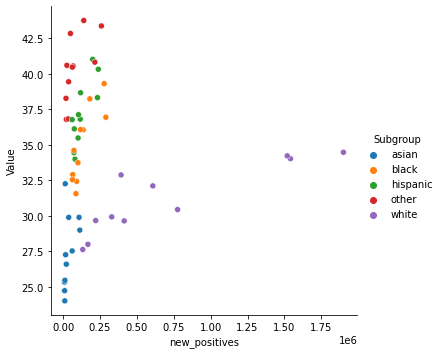

In [91]:
visual_model_race = lr().fit(final_data_race[ ['new_positives'] ], final_data_race['Value'])

sns.relplot(x = 'new_positives', y = 'Value', data = final_data_race, hue = 'Subgroup');

Interestingly, this graph seems to show little to no linear correlation within any race except for white. Because of this, I will do a multivariate linear regression model just on white individuals to see if there is a correlation. 

In [101]:
race_white = final_data_race[final_data_race.Subgroup == 'white']
race_white_model = lr().fit(race_white[predictors], race_white['Value'])
for featurenum in range(len(predictors)):
    print('The coefficient for {} is {:.3}'.format(predictors[featurenum],race_white_model.coef_[featurenum]))
print('The r-squared score of this multivariable linear regression model is {:.3f}'.format(race_white_model.score(race_white[predictors], race_white.Value)))


The coefficient for new_deaths is -0.000259
The coefficient for hospitalized is 0.000177
The coefficient for new_positives is -2.47e-09
The r-squared score of this multivariable linear regression model is 0.834


While there is only an r-squared value of 0.09 for multivariate linear regression across races, there is an r-squared value of 0.834 for just white individuals. I will find the p-values using a hypothesis test to test the significance of these coefficients.

In [102]:
x1 = race_white[predictors].reset_index(drop = True)
y1 = race_white[['Value']].reset_index(drop = True)
y_series1 = final_data_age.Value
df1 = x1.join(y1)
sm_model1 = smf.ols("y1 ~ x1", data=df1)
result1 = sm_model1.fit()
print('P values:')
display(result1.pvalues)

P values:


Intercept    1.097430e-07
x1[0]        1.502646e-01
x1[1]        2.553903e-01
x1[2]        9.994678e-01
dtype: float64

Confidence Intervals:


,0,1
Intercept,24.608763,30.613802
x1[0],-0.000639,0.000120
x1[1],-0.000161,0.000516
x1[2],-0.000008,0.000008


The probability of getting a regression coefficient of -0.000259 for new_positives by random chance alone is 0.15. Since the p-value of 0.15 is NOT less than alpha = 0.05, we CANNOT reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of new_positives could be due to random chance, and therefore the linear relationship between new_positives and mental health value in this model is not statistically significant.

The probability of getting a regression coefficient between new deaths and mental health value of  0.000177 by random chance alone is 0.26. Since the p-value of 0.26 is NOT less than alpha = 0.05, we CANNOT reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of new_deaths (3.26e-06) could be due to random chance, and therefore, the linear relationship between new_deaths and mental health value in this model is NOT statistically significant.

The probability of getting a regression coefficient of -2.47 x $10^{-9}$ for hospitalizations by random chance alone is 0.999. Since the p-value of 0.999 is NOT less than alpha = 0.05, we CANNOT reject the null hypothesis. There is sufficient evidence to conclude that our regression coefficient of hospitalizations is due to random chance, and therefore, the linear relationship between hospitalizations and mental health value in this model is NOT statistically significant.

Since none of the coefficients in the multivariate linear regression model are statistically significant, the model as a whole is not statistically significant.

### Linear Regression (mental health value vs. phase)


In [45]:
multi_model_time = lr()

final_data_state.loc[final_data_state['Phase'] == '1', 'Phase'] = 1
final_data_state.loc[final_data_state['Phase'] == '2', 'Phase'] = 2
final_data_state.loc[final_data_state['Phase'] == '3 (Oct 28 � Dec 21)', 'Phase'] = 3
final_data_state.loc[final_data_state['Phase'] == '3 (Jan 6 � Mar 1)', 'Phase'] = 4

X = final_data_state[['Phase']]
y =final_data_state.Value

multi_model_time.fit(X, y)
print('r-squared score of linear regression model for phase and mental health value is {:.2f}'\
      .format(multi_model_time.score(X,y)))

r-squared score of linear regression model for phase and mental health value is 0.06


Since the r-squared value of 0.06 does not show a linear relationship, I will not check the significance.

### K - Means Clustering 

In [46]:
state_data = master_data[master_data.time_start == master_data.time_start[3190]]
state_data = state_data[state_data.Indicator == 'Symptoms of Anxiety Disorder or Depressive Disorder']
#The above 2 lines of code take 1 random time period (Sep 16 - Sep 28 2020) and 1 indicator so that each state only appears
# once in state_data so that I can better interpret the clusters

state_data = state_data[['state','percent_positive','Value']].copy().dropna().reset_index(drop = True)
#subsets only the columns that I need and drops rows with NaNs

state_data.head()

,state,percent_positive,Value
0,Alabama,0.1326,37.2
1,Alaska,0.0337,35.5
2,Arizona,0.0415,39.3
3,Arkansas,0.0843,31.6
4,California,0.0291,42.3


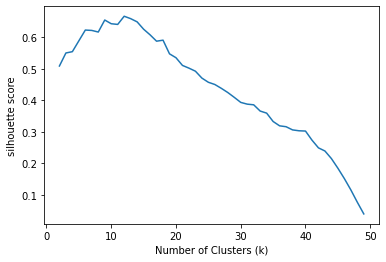

In [47]:
K = range(2, 50) #There are 50 states, so I will find the silouette scores for all possible 
                 #   cluster numbers from 2 to 50 (it is not possible to find silouette score for 1 cluster)
sil = []
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(state_data.drop(columns = ['state'])) 
    cluster_labels = kmeans.labels_

    score = float(([silhouette_score(state_data[['percent_positive','Value']], cluster_labels)])[0])
    sil.append(score)    
    
plt.plot(K, sil)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

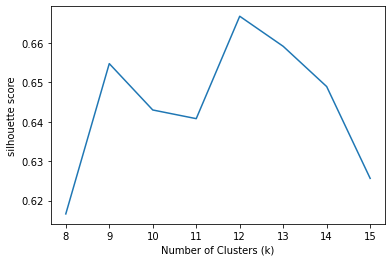

In [48]:
#It is too hard to tell exactly where the maximum falls, so below I will plot a subset of the clusters/scores for a
# more close up view

plt.plot(K[6:14], sil[6:14])
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

In [49]:
#Since the maximum silouette score occurs when k = 12, the number of clusters that I will use is 12
cluster_num = 12

kmeans = KMeans(n_clusters=cluster_num) # clustering object
kmeans.fit(state_data.drop(columns = ['state']))                 # fit to data
y_kmeans = kmeans.predict(state_data.drop(columns = ['state']))  # predict cluster labels

cluster_labels = kmeans.labels_
state_data['cluster_label'] = cluster_labels # creates column that shows clusterlabel for each state

state_data.head()

,state,percent_positive,Value,cluster_label
0,Alabama,0.1326,37.2,6
1,Alaska,0.0337,35.5,11
2,Arizona,0.0415,39.3,1
3,Arkansas,0.0843,31.6,4
4,California,0.0291,42.3,3


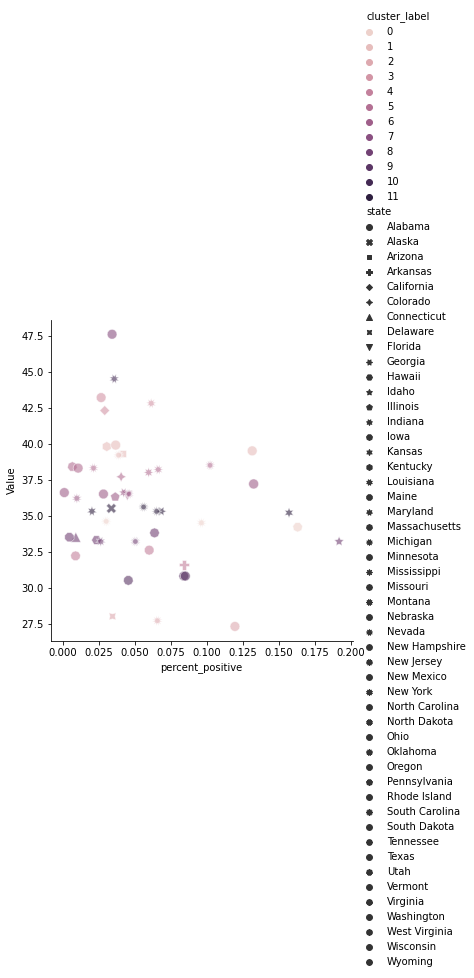

In [50]:
sns.relplot(x="percent_positive", y="Value", data=state_data, hue = 'cluster_label', style = 'state',legend = 'full', alpha = 0.6, s = 100);

In [51]:
#the following loop will print which states are part of which clusters
for x in range(cluster_num):
    print('Cluster {} contains:'.format(x+1))
    print(state_data[state_data.cluster_label == x].state.unique())
    print()

Cluster 1 contains:
['Iowa' 'Oklahoma' 'Pennsylvania']

Cluster 2 contains:
['Arizona' 'Kentucky' 'Texas' 'Washington' 'West Virginia']

Cluster 3 contains:
['Delaware' 'North Dakota' 'South Dakota']

Cluster 4 contains:
['California' 'Nevada' 'New Mexico']

Cluster 5 contains:
['Arkansas' 'New Hampshire' 'North Carolina']

Cluster 6 contains:
['Colorado' 'Massachusetts' 'Mississippi' 'Montana' 'New Jersey'
 'Rhode Island' 'Utah']

Cluster 7 contains:
['Alabama' 'Florida' 'Illinois' 'Indiana' 'New York' 'Ohio' 'Vermont'
 'Virginia']

Cluster 8 contains:
['Oregon']

Cluster 9 contains:
['Connecticut' 'Hawaii' 'Idaho' 'Maine' 'Michigan' 'Missouri' 'Wyoming']

Cluster 10 contains:
['Minnesota' 'Nebraska' 'Wisconsin']

Cluster 11 contains:
['Louisiana']

Cluster 12 contains:
['Alaska' 'Georgia' 'Kansas' 'Maryland' 'South Carolina' 'Tennessee']



I will now evaluate the significance of this k - means clustering model using a sillouette score.

In [52]:
silhouette_score_all = [silhouette_score(state_data[['percent_positive','Value']], cluster_labels)]
print('The silhouette_score of this k - means clustering model is {:.3f}'.format(silhouette_score_all[0]))

The silhouette_score of this k - means clustering model is 0.667


Since silhouette score ranges from -1 to 1, a silhouette score of 0.667 represents a reasonably strong structure of clusters. I can then conclude that my k - means clustering results are significant.

## Interpretation and Conclusions

Interestingly, there seems to be practically no linear correlation between covid cases/hospitalizations/deaths and anxiety/depression within the population as a whole or when state is used as indicator variables in a multivariate regression model. This surprises me to a certain extent because since different states took different approaches to the pandemic and restrictions, I thought that there may be underlying differences in base level mental health values or covid trends that was causing the lack of obvious correlation, but that grouping by state may show more correlation. For example, I found it interesting to note that in the final boxplot of my exploratory data analysis, the so-called "problem states" (FL, CA, NY) have higher median levels of anxiety and depression than the others. However, using state as an indicator variable results in an r squared value of 0.05, showing that this multivariate linear regression is not significant. One potential reason for the lack of significance is the contrast between the lack of Covid-19 testing and data in the early months of the pandemic and the prevalence of surveillance testing in more recent months. This could skew the data by increasing the percentage of Covid-19 cases accounted for with each subsequent month and mask potentially existing linear relationships.

When fitting a multivariate linear regression model on covid cases/hospitalizations/deaths/race to mental health value, the low correlation coefficient of 0.09 suggests the lack of a linear correlation. What was interesting, however, was that there was a moderate linear relationship when only white individuals were considered. However, this linear regression ended up being NOT statistically significant. While this is slightly surprising, given that there are lots of studies and data showing that different races are affecting differently (ex. black populations affected worse than white ones), there are lots of other factors that have a role in this such as socioeconomic status, culture, and location. There will be differences between an individual living in a wealthy neighborhood versus poor communal housing, regardless of race. I think that the differences in covid numbers between races may have to do with these other effects that differ between races rather than the races themselves which is why there was such a low correlation. Additionally, there were other major historical events besides the pandemic in 2020 that would play a role in mental health. The racial justice movement and events such as the death of George Floyd affected different races differently, and also were not directly tied to Covid-19, so it makes sense that factors like this would affect the linearity of the data.

From preliminary data analysis, it appears that there may be an upward trend in anxiety and depression rates as the pandemic progresses through the different phases. This suggested that it might be the chronic effects of life and restrictions in a pandemic that causes increased rates of anxiety and depression rather than the acute affects of the actual virus itself. However, the correlation coefficient of this linear regression model is 0.06 which does not demonstrate a linear relationship. Thus, we cannot conclude that the longevity of quarentine can be used to predict mental health. This still makes logical sense as an explanation, which makes me think that there may be underlying factors affecting the data and its linearity. One such factor could be the difference in anxiety and depression. One way that this project could be expanded is to analyze anxiety and depression separately. Logically, it would make sense if they followed different trajectories. For example, anxiety may increase as cases increase and decrease as cases decrease, but depression may increase steadily with time, independent of rising and falling cases.

Interestingly, as is seen in the three different plots that graph either covid cases, hospitalizations, or deaths with mental health value, it appears that the best model of the data comes from creating two separate linear regression models for each age group because each age group has a distinct slope. In general anxiety and depression is worse in younger generations no matter the covid levels. It surprises me that increases in covid numbers tends to increase anxiety/depression more strongly/quickly for the younger age group than the old, since older people are more vulnerable to the covid-19 virus. One reason for this could be mental health stigma that is more prominent in older generations, and another reason could be that anxiety and depression rates in non-covid times are already higher for younger generations.

The most significant finding was the strong correlation ($r^2$ = 0.98) between covid cases/hospitalizations/deaths and anxiety/depression rates when age group (18-49 or 50+) was taken into account in our multivariate linear regression model. This makes sense because covid affects different age groups differently, and the restrictions also affect the daily lives of the different age groups differently. For example, older people are more susceptible to serious illness or death from the coronavirus, and younger people have a greater disruption to their daily lives because they are working and going to school, etc rather than retired. This finding can be used to divert more mental health resources to individuals under the age of 50 when cases start to rise, and to prioritize speed when diverting these resources since the younger people's anxiety and depression rates tend to increase more quickly for the same increase in cases. Since the significance test showed that new positive cases were the only Covid-19 metric that showed significance when predicting mental health, it would make sense to send mental health resources to younger Americans as soon as cases begin to rise, regardless of hospitalizations and deaths. This is interesting, because it suggests that it is the virus's presence rather than deadliness that affects mental health the most. 

Interestingly, the most significant model was the k -means clustering model that placed states into 12 clusters. From looking at these clusters, it doesn't seem that there is any obvious relationship within each cluster such as geographic location, political affiliation, or population, however my silhouette score suggests that there is indeed significance. An interesting extension of the project would be to analyze factors within each state, perhaps by looking at aspects of the healthcare systems, demographic makeup of the states, or other aspects. Similarly to what I discussed in response to the race data, it could be interesting to analyze how each state was affected by the racial justice movement and see if that plays a role in the clusters since that was another major influence on mental health in the past year for certain groups.

Another way this project could be expanded is to compare the trends and associations between infection/death/hospitalization rate between the Covid-19 pandemic, and other contagious diseases, including epidemics. This would be useful since we are now nearing the end of the pandemic, and so these results will be less useful as the coronavirus goes away. If we can establish associations with other viruses, or even the common flu, we may be able to generalize the findings to better predict mental health values in future circumstances since it is unlikely that there will be another Covid-19 pandemic.

Finally, the findings of this project could also be expanded upon by adding vaccination data to the dataset. This would allow us to see whether weeks/months of high vaccination rates positively impacted mental health or helped compensate for the negative effects of the cases/hospitalizations/deaths in that time period.

## Limitations

Possible limitations include the following:
- Covid data was very limited in the early months of the pandemic. It is highly likely (almost certain) that there were many cases that went unknown, and therefore are not counted in the data. Also, as the pandemic progressed, surveillence testing became more common to catch more cases. Missing or incorrect Covid-19 data, especially early in the pandemic, could conceal linear trends that would exist if the data were close to perfect. This could therefore contribute to the lack of correlation in several linear regression models. 
- Some people are asymptomatic upon contraction of the coronavirus. If they were asymptomatic, they may not have been tested, and their case would not be included in our numbers. Similar to the previous limitation, these missing cases could conceal linear trends that would exist if the data were close to perfect and contribute to the lack of correlation in several linear regression models. 
- For the mental health data, individuals scored themselves on subjective feelings of anxiety and depression, rather than clinical diagnoses or other more objective markers. Also, the anxiety and depression were only rated on a scale of 1 - 3 while there is likely a much greater degree of variability in mental health that cannot be captured by just 3 groups. This can affect the overall accuracy of the mental health values and contribute to the lack of linear correlation in our models, even if linear correlations exist. Linear regression models are not robust, so the accumulation of many small biases in mental health value, could severely affect the data.
- The time period groupings for the mental health data set are not even time periods. For example, some of the time periods are 13 days, while others are 6. There are also some missing weeks and days throughout. This also means that of the time periods in the covid data, some are 13 days, while other are 1 day, if they did not correspond to a time period from the mental health data. This could mask fluctuations within some of the longer time periods and overemphasize fluctuations or changes in the smaller ones, leading to less reliable data.
- The Covid data is compiled from each state's reports, and each state uses slightly different definitions, there is opportunity for some discrepancy between states as to what they count as a positive or probable covid case, etc. Since there is no single entity that collects and gathers all of the data, there could be discrepancies between health districts that lead to biases in the data. For example, some districts count all possible or probable cases, while others include only PCR positive tests. This could mask relationships between coronavirus rates and mental health because some of the data will be an overestimation of the true covid rates and some data will be an underestimation. 
- There are different methods of Covid-19 testing with some being more reliable than others. Differences in the type of tests could lead to errors in results. For example, there are more false positives with rapid tests (which identify the coronavirus protein) than polymerase chain reaction tests (which identify the viruses genetic material). This could lead to districts who counted rapid tests to overreport the true level of cases in their district. 
- For some geographic or demographic regions there may be more access to Covid tests than others. For example, if certain racial groups tend to have lower socioeconomic status, they may also have less access to testing. This could lead to under reported results for these groups which could skew the data and predict less covid cases to cause an increase in anxiety and depression compared to other groups which could lead the government and mental health authorities to send more resources than are actually needed.
- Because the age groups were divided slightly differently between the demographic data and the mental health data, I had to divide individuals into only two age groups rather than more. This could fail to account for differences within generations in each age group.
- The race data places people of mixed race in the "other" category rather than in the category of either of their respective races. This means people of mixed race are unaccounted for in both of the races that they actually are, and it makes the "other" category less reliable because in addition to containing individuals that are not white, black, asian, or hispanic, it also includes individuals who are white, black, Asian, and hispanic, just not fully so. 
- Despite a global pandemic, there were other significant events and movements that could affect mental health values over the past year. This includes responses to the racial justice movement and the political unrest and presidential election.

## Source Code

Link Google drive folder with original datasets, previous project phases/code, and data cleaning appendix: 
https://drive.google.com/drive/folders/1UHw36IxETj85N22IAJNDpTHCmmex_bnn?usp=sharing

## Acknowledgements

Incorporated some modified code from class code and homeworks on linear and multivariate linear regression, hypothesis testing, and k-means clustering. Thank you to Profesor Wilkens and INFO 2950 TA's, specifically Rachel Spivak, Emma Condie, Vishal Vardhineedi, Chris Browne, and Daniel Riley for guiding me on my questions regarding my data cleaning, analysis, and significance. Thank you to the following individuals for providing useful feedback throughout different parts of the project: Sebastian Jie Guo, William Jeffries. I utilized the following stack overflow post to learn how to open a json jupyter to use in my pandas data frame (https://stackoverflow.com/questions/50653973/how-to-load-a-json-file-in-jupyter-notebook-using-pandas/50654276). I used the following stack overflow post to learn how to reverse the order of a dataframe (https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe). I also referenced stack overflow for a handful of debugging issues throughout the project.